In [1]:
import pandas as pd 
import statistics as st 
import seaborn as sb 

In [2]:
dataset = pd.read_csv("tempo.csv", sep = ";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [41]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [4]:
#TRATANDO APARENCIA
dataset.groupby(dataset['Aparencia']).size()

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [5]:
dataset['Aparencia'].isnull().sum()

0

In [20]:
dataset['Aparencia'].isnull().sum()

0

In [7]:
dataset.loc[dataset['Aparencia'].isin(['menos']), 'Aparencia'] = 'sol'
dataset.groupby(dataset['Aparencia']).size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [8]:
#TRATANDO TEMPERATURA
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [21]:
dataset['Temperatura'].isnull().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperatura'>

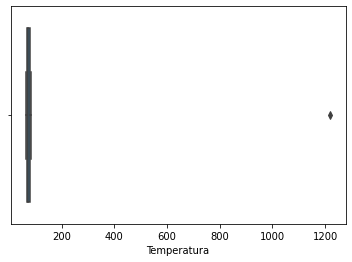

In [13]:
sb.boxplot(dataset['Temperatura'])

In [14]:
mediana_temp = st.median(dataset['Temperatura'])
mediana_temp

73.5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperatura'>

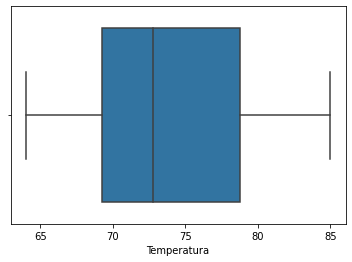

In [15]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana_temp
sb.boxplot(dataset['Temperatura'])

In [16]:
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [17]:
#TRATANDO UMIDADE
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [22]:
dataset['Umidade'].isnull().sum()

1

In [23]:
dataset.groupby(dataset['Umidade']).size()

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Umidade'>

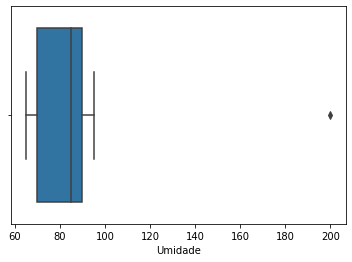

In [18]:
sb.boxplot(dataset['Umidade'])

In [26]:
dataset.loc[(dataset['Umidade'].isnull()) | (dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
3,chuva,70.0,NaN,FALSO,sim
9,chuva,75.0,200.0,NaN,sim


In [27]:
mediana_umidade = st.median(dataset['Umidade'])
mediana_umidade

85.5

In [28]:
dataset.loc[(dataset['Umidade'].isnull()) | (dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana_umidade
dataset.loc[(dataset['Umidade'].isnull()) | (dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [29]:
#TRATANDO DADOS JOGAR
dataset['Jogar'].describe()

count      14
unique      2
top       sim
freq        9
Name: Jogar, dtype: object

In [30]:
dataset.groupby(dataset['Jogar']).size()

Jogar
nao    5
sim    9
dtype: int64

In [33]:
#TRATANDO DADOS VENTO
dataset['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [35]:
dataset['Vento'].isnull().sum()

1

In [36]:
dataset.groupby(dataset['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [38]:
dataset.loc[(dataset['Vento'].isnull()), 'Vento'] = 'FALSO'
dataset.groupby(dataset['Vento']).size()

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [39]:
dataset['Vento'].isnull().sum()

0

In [40]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
